In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load sheets from Excel files
pl_data = pd.read_excel("/content/P & L Data (in Rs. Crore).xlsx")
pl_ratios = pd.read_excel("/content/P & L Ratios.xlsx")
growth_ratios = pd.read_excel("/content/Growth Ratios.xlsx")
balance_sheet_data = pd.read_excel("/content/Balance Sheet Data.xlsx")
balance_sheet_ratios = pd.read_excel("/content/Balance Sheet Ratios.xlsx")
per_share_data = pd.read_excel("/content/Per Share Data and Ratios.xlsx")
employee_data = pd.read_excel("/content/Employee Data.xlsx")

In [ ]:
# Descriptive Analysis
## Calculate YoY changes for Revenue, Net Profit, EPS
def calc_yoy(df, col_list):
    for col in col_list:
        df[f'{col}_YoY_FY24'] = (df[col]['FY 24'] - df[col]['FY 23']) / df[col]['FY 23'] * 100
        df[f'{col}_YoY_FY25'] = (df[col]['FY 25'] - df[col]['FY 24']) / df[col]['FY 24'] * 100
    return df

# Summarize min, max, mean growth and highlight top/bottom metrics
def summarize_growth(df, metric_cols):
    growth_summary = {}
    for metric in metric_cols:
        yoy_values = df[[f'{metric}_YoY_FY24', f'{metric}_YoY_FY25']].values.flatten()
        growth_summary[metric] = {
            'min': np.min(yoy_values),
            'max': np.max(yoy_values),
            'mean': np.mean(yoy_values)
        }
    return growth_summary

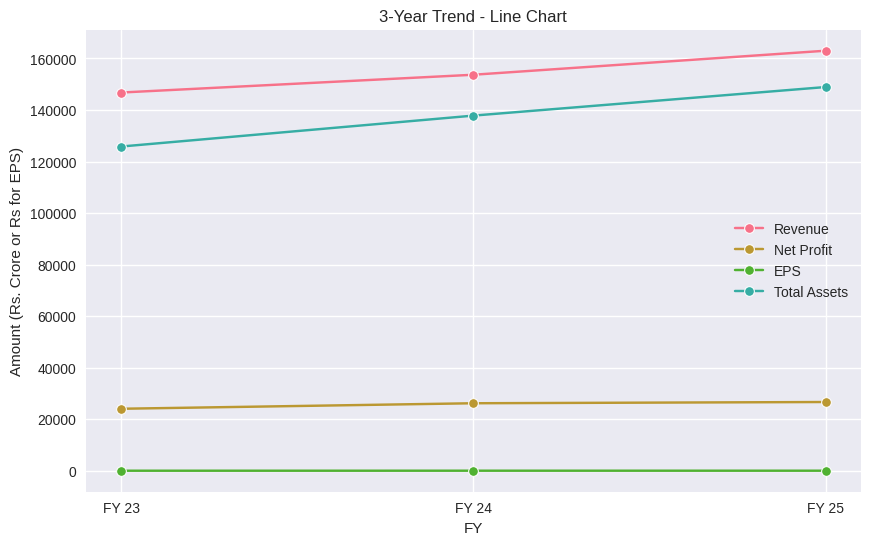

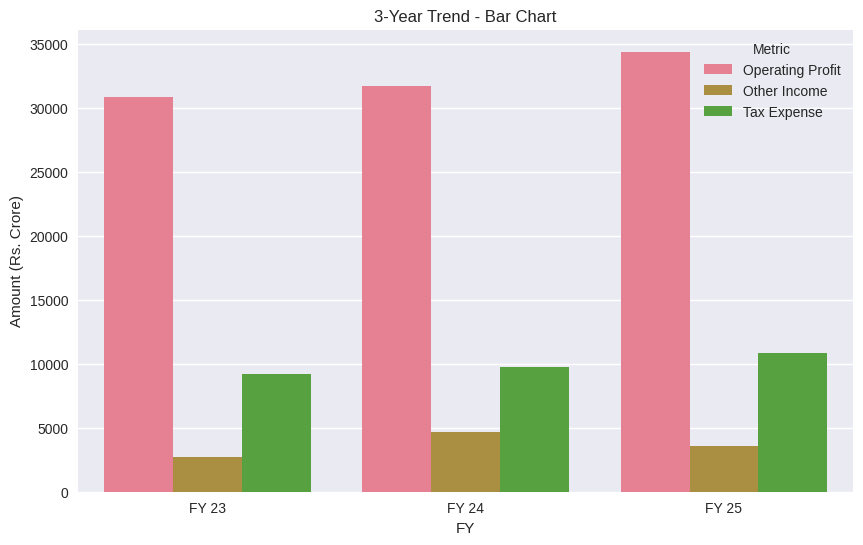

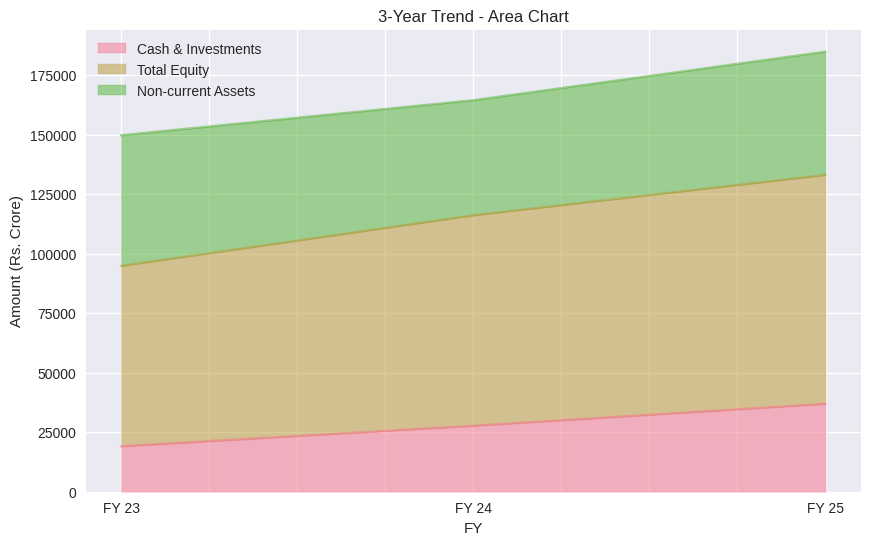

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Excel sheets with header=1 to skip extra title row
pl_data = pd.read_excel("/content/P & L Data (in Rs. Crore).xlsx", sheet_name="P & L Data (in Rs. Crore)", header=1)
balance_sheet_data = pd.read_excel("/content/Balance Sheet Data.xlsx", header=1)
per_share_data = pd.read_excel("/content/Per Share Data and Ratios.xlsx", header=1)
employee_data = pd.read_excel("/content/Employee Data.xlsx", header=1)

# Strip columns of whitespace if any
pl_data.columns = pl_data.columns.str.strip()
balance_sheet_data.columns = balance_sheet_data.columns.str.strip()
per_share_data.columns = per_share_data.columns.str.strip()
employee_data.columns = employee_data.columns.str.strip()

# Strip values in 'Particulars' for cleanup
for df in [pl_data, balance_sheet_data, per_share_data, employee_data]:
    df['Particulars'] = df['Particulars'].str.strip()

years = ['FY 23', 'FY 24', 'FY 25']  # Chronological for plotting
years_desc = years[::-1]  # For extraction (FY 25 first in file)

# Extract and reverse for chronological order
line_data = pd.DataFrame({
    'FY': years,
    'Revenue': pl_data.loc[pl_data['Particulars'] == 'Revenue', years_desc].values.flatten()[::-1],
    'Net Profit': pl_data.loc[pl_data['Particulars'] == 'Net profit attributable to the Owners of the company', years_desc].values.flatten()[::-1],
    'EPS': per_share_data.loc[per_share_data['Particulars'] == 'Basic EPS', years_desc].values.flatten()[::-1],
    'Total Assets': balance_sheet_data.loc[balance_sheet_data['Particulars'] == 'Total assets', years_desc].values.flatten()[::-1]
})

bar_data = pd.DataFrame({
    'FY': years,
    'Operating Profit': pl_data.loc[pl_data['Particulars'] == 'Operating profit', years_desc].values.flatten()[::-1],
    'Other Income': pl_data.loc[pl_data['Particulars'] == 'Other income', years_desc].values.flatten()[::-1],
    'Tax Expense': pl_data.loc[pl_data['Particulars'] == 'Income tax expense', years_desc].values.flatten()[::-1]
})

area_data = pd.DataFrame({
    'FY': years,
    'Cash & Investments': (balance_sheet_data.loc[balance_sheet_data['Particulars'] == 'Cash and cash equivalents', years_desc].values.flatten() +
                           balance_sheet_data.loc[balance_sheet_data['Particulars'] == 'Current investments', years_desc].values.flatten())[::-1],
    'Total Equity': balance_sheet_data.loc[balance_sheet_data['Particulars'] == 'Total equity', years_desc].values.flatten()[::-1],
    'Non-current Assets': balance_sheet_data.loc[balance_sheet_data['Particulars'] == 'Non-current assets', years_desc].values.flatten()[::-1]
})

# Plotting code unchanged...

plt.figure(figsize=(10, 6))
for metric in ['Revenue', 'Net Profit', 'EPS', 'Total Assets']:
    sns.lineplot(data=line_data, x='FY', y=metric, marker='o', label=metric)
plt.title('3-Year Trend - Line Chart')
plt.ylabel('Amount (Rs. Crore or Rs for EPS)')
plt.grid(True)
plt.legend()
plt.show()

bar_data_melt = bar_data.melt(id_vars='FY', var_name='Metric', value_name='Value')
plt.figure(figsize=(10, 6))
sns.barplot(x='FY', y='Value', hue='Metric', data=bar_data_melt)
plt.title('3-Year Trend - Bar Chart')
plt.ylabel('Amount (Rs. Crore)')
plt.show()

area_data.set_index('FY', inplace=True)
area_data.plot(kind='area', figsize=(10, 6), alpha=0.5)
plt.title('3-Year Trend - Area Chart')
plt.ylabel('Amount (Rs. Crore)')
plt.grid(True)
plt.show()

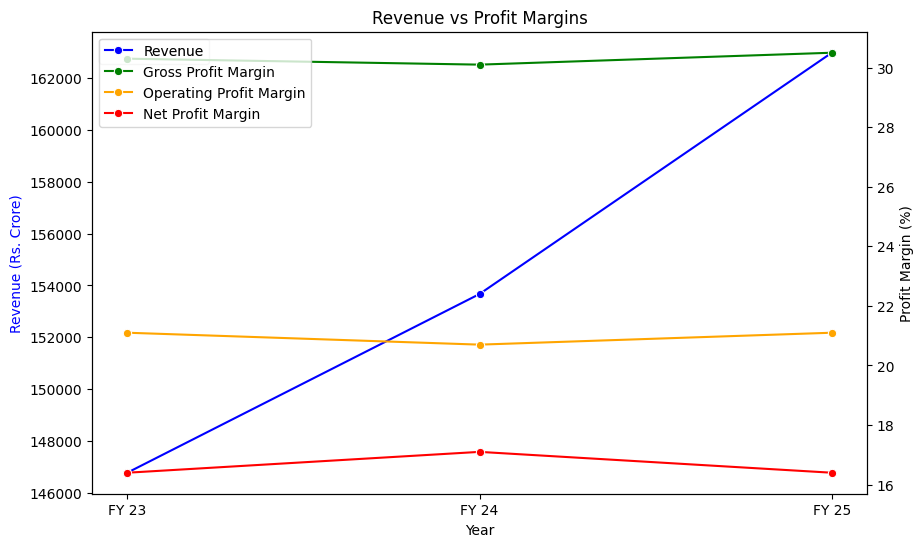

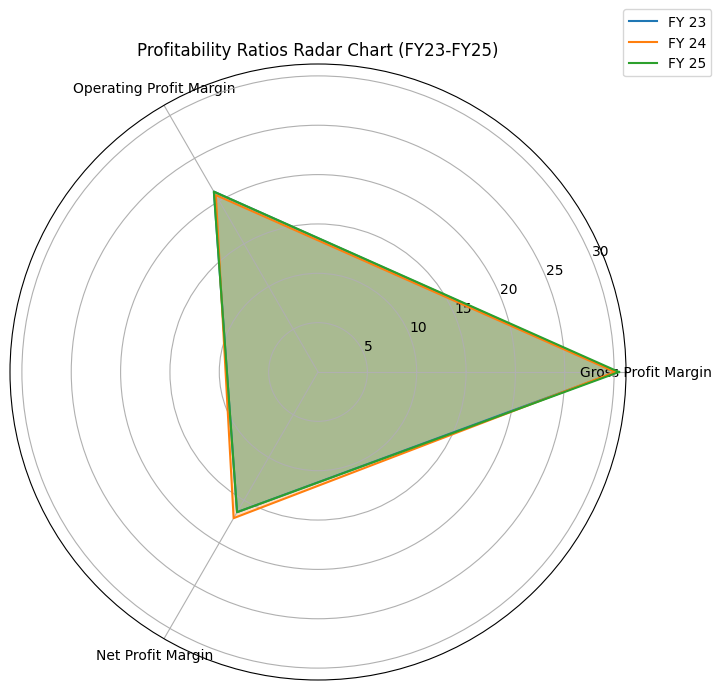

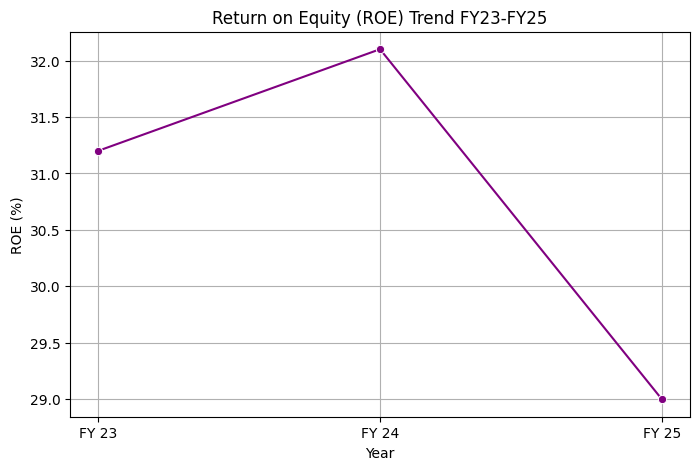

ROE Values:
FY 23: 31.20%
FY 24: 32.10%
FY 25: 29.00%

Interpretation of ROE Trend:
ROE trend is mixed; requires further analysis.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def clean_df(df):
    df.columns = df.columns.str.strip()
    df['Particulars'] = df['Particulars'].str.strip()
    return df

# Load files with header=1 to correctly read the header
pl_ratios = pd.read_excel("/content/P & L Ratios.xlsx", header=1)
pl_data = pd.read_excel("/content/P & L Data (in Rs. Crore).xlsx", header=1)
balance_ratios = pd.read_excel("/content/Balance Sheet Ratios.xlsx", header=1)

pl_ratios = clean_df(pl_ratios)
pl_data = clean_df(pl_data)
balance_ratios = clean_df(balance_ratios)

years = ['FY 23', 'FY 24', 'FY 25']

# Extract data
revenue = pl_data.loc[pl_data['Particulars'] == 'Revenue', years].values.flatten().astype(float)
gross_margin = pl_ratios.loc[pl_ratios['Particulars'] == 'Gross Profit/ revenue (%)', years].values.flatten().astype(float)
operating_margin = pl_ratios.loc[pl_ratios['Particulars'] == 'Operating profit/ revenue (%)', years].values.flatten().astype(float)
net_margin = pl_ratios.loc[pl_ratios['Particulars'] == 'Profit after tax (PAT) / Revenue (%)', years].values.flatten().astype(float)

df_combo = pd.DataFrame({
    'Year': years,
    'Revenue': revenue,
    'Gross Profit Margin': gross_margin,
    'Operating Profit Margin': operating_margin,
    'Net Profit Margin': net_margin
})

# Combo chart
fig, ax1 = plt.subplots(figsize=(10,6))
sns.lineplot(data=df_combo, x='Year', y='Revenue', marker='o', ax=ax1, color='blue', label='Revenue')
ax1.set_ylabel("Revenue (Rs. Crore)", color='blue')
ax1.set_title("Revenue vs Profit Margins")

ax2 = ax1.twinx()
sns.lineplot(data=df_combo, x='Year', y='Gross Profit Margin', marker='o', ax=ax2, label='Gross Profit Margin', color='green')
sns.lineplot(data=df_combo, x='Year', y='Operating Profit Margin', marker='o', ax=ax2, label='Operating Profit Margin', color='orange')
sns.lineplot(data=df_combo, x='Year', y='Net Profit Margin', marker='o', ax=ax2, label='Net Profit Margin', color='red')
ax2.set_ylabel("Profit Margin (%)", color='black')
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
plt.show()

# Radar chart
labels = ['Gross Profit Margin', 'Operating Profit Margin', 'Net Profit Margin']
num_vars = len(labels)
angles = np.linspace(0, 2*np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8,8), subplot_kw=dict(polar=True))
for i, year in enumerate(years):
    values = [gross_margin[i], operating_margin[i], net_margin[i]]
    values += values[:1]
    ax.plot(angles, values, label=year)
    ax.fill(angles, values, alpha=0.25)

ax.set_thetagrids(np.degrees(angles[:-1]), labels)
ax.set_title("Profitability Ratios Radar Chart (FY23-FY25)")
ax.grid(True)
ax.legend(loc='upper right', bbox_to_anchor=(1.15, 1.1))
plt.show()

# ROE extraction and trend
roe = balance_ratios.loc[balance_ratios['Particulars'].str.contains('Return on Equity', case=False), years].values.flatten().astype(float)
df_roe = pd.DataFrame({'Year': years, 'ROE (%)': roe})

plt.figure(figsize=(8,5))
sns.lineplot(data=df_roe, x='Year', y='ROE (%)', marker='o', color='purple')
plt.title("Return on Equity (ROE) Trend FY23-FY25")
plt.ylabel("ROE (%)")
plt.grid(True)
plt.show()

print("ROE Values:")
for y, val in zip(years, roe):
    print(f"{y}: {val:.2f}%")

print("\nInterpretation of ROE Trend:")
if all(np.diff(roe) > 0):
    print("ROE shows consistent improvement indicating growing profitability.")
elif all(np.diff(roe) < 0):
    print("ROE shows declining trend indicating potential concerns.")
else:
    print("ROE trend is mixed; requires further analysis.")


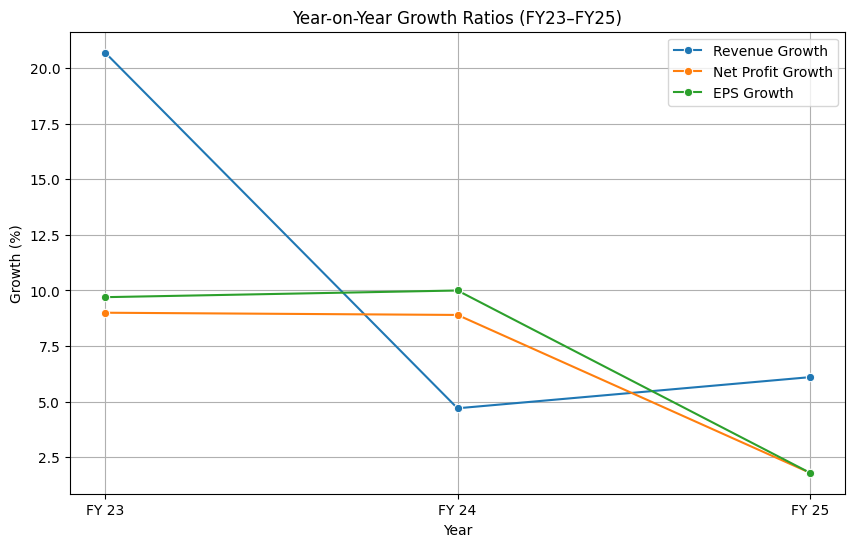

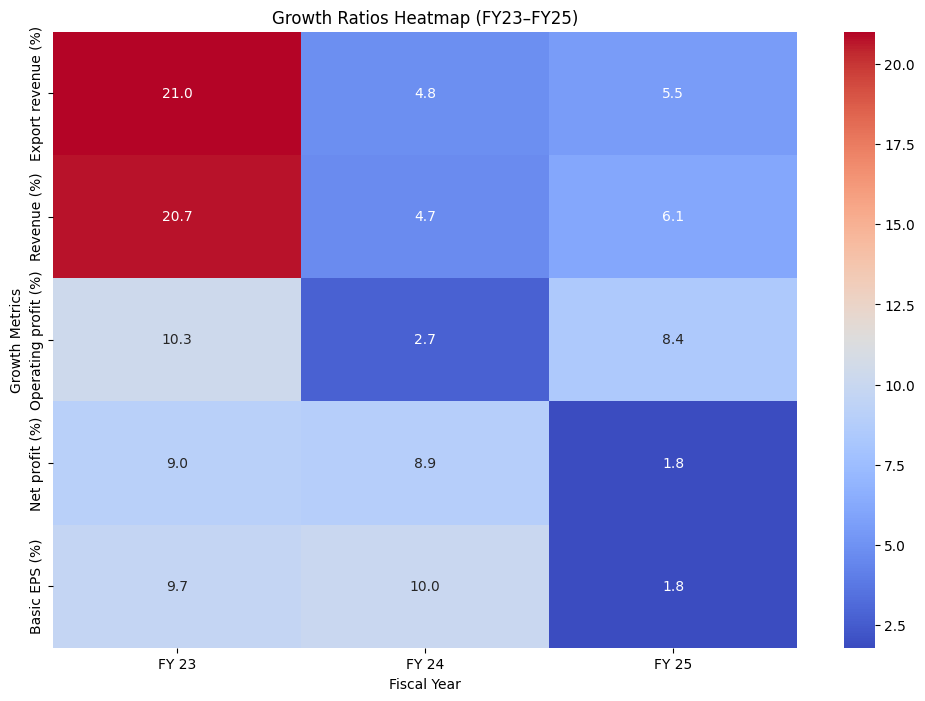

Fastest growth area (average over FY23-FY25): Revenue Growth with mean growth 10.50%
Slowest growth area (average over FY23-FY25): Net Profit Growth with mean growth 6.57%


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Helper function to clean dataframe columns and Particulars column
def clean_df(df):
    df.columns = df.columns.str.strip()
    df['Particulars'] = df['Particulars'].str.strip()
    return df

# Load Excel sheets with header=1 to use correct headers
pl_data = pd.read_excel("/content/P & L Data (in Rs. Crore).xlsx", header=1)
growth_ratios = pd.read_excel("/content/Growth Ratios.xlsx", header=1)
per_share_data = pd.read_excel("/content/Per Share Data and Ratios.xlsx", header=1)

# Clean dataframes
pl_data = clean_df(pl_data)
growth_ratios = clean_df(growth_ratios)
per_share_data = clean_df(per_share_data)

# Define fiscal years in chronological order
years = ['FY 23', 'FY 24', 'FY 25']

# Extract Revenue growth (%)
revenue_growth = growth_ratios.loc[growth_ratios['Particulars'] == 'Revenue (%)', years].values.flatten().astype(float)
# Extract Net Profit growth (%)
net_profit_growth = growth_ratios.loc[growth_ratios['Particulars'] == 'Net profit (%)', years].values.flatten().astype(float)
# Extract Basic EPS growth (%)
eps_growth = growth_ratios.loc[growth_ratios['Particulars'] == 'Basic EPS (%)', years].values.flatten().astype(float)

# Prepare dataframe for growth line chart
growth_df = pd.DataFrame({
    'Year': years,
    'Revenue Growth (%)': revenue_growth,
    'Net Profit Growth (%)': net_profit_growth,
    'EPS Growth (%)': eps_growth
})

# Line chart for Revenue Growth, Net Profit Growth, EPS Growth
plt.figure(figsize=(10, 6))
sns.lineplot(data=growth_df, x='Year', y='Revenue Growth (%)', marker='o', label='Revenue Growth')
sns.lineplot(data=growth_df, x='Year', y='Net Profit Growth (%)', marker='o', label='Net Profit Growth')
sns.lineplot(data=growth_df, x='Year', y='EPS Growth (%)', marker='o', label='EPS Growth')
plt.title('Year-on-Year Growth Ratios (FY23–FY25)')
plt.ylabel('Growth (%)')
plt.grid(True)
plt.legend()
plt.show()

# For heatmap, use all growth metrics available in Growth Ratios sheet except the 'Particulars' column
# Let's load all numeric growth values from growth_ratios (excluding 'Particulars' column)

# Filter out only numeric columns related to FY years
growth_data_numeric = growth_ratios[years].apply(pd.to_numeric, errors='coerce')

plt.figure(figsize=(12, 8))
sns.heatmap(growth_data_numeric, annot=True, fmt='.1f', yticklabels=growth_ratios['Particulars'], cmap='coolwarm')
plt.title('Growth Ratios Heatmap (FY23–FY25)')
plt.xlabel('Fiscal Year')
plt.ylabel('Growth Metrics')
plt.show()

# Identify fastest/slowest growth area based on mean growth over 3 years
mean_growth = {
    'Revenue Growth': revenue_growth.mean(),
    'Net Profit Growth': net_profit_growth.mean(),
    'EPS Growth': eps_growth.mean()
}

fastest_growth = max(mean_growth, key=mean_growth.get)
slowest_growth = min(mean_growth, key=mean_growth.get)

print(f"Fastest growth area (average over FY23-FY25): {fastest_growth} with mean growth {mean_growth[fastest_growth]:.2f}%")
print(f"Slowest growth area (average over FY23-FY25): {slowest_growth} with mean growth {mean_growth[slowest_growth]:.2f}%")


Liquidity Ratios (%):
FY 23: 15.17%
FY 24: 20.10%
FY 25: 24.81%


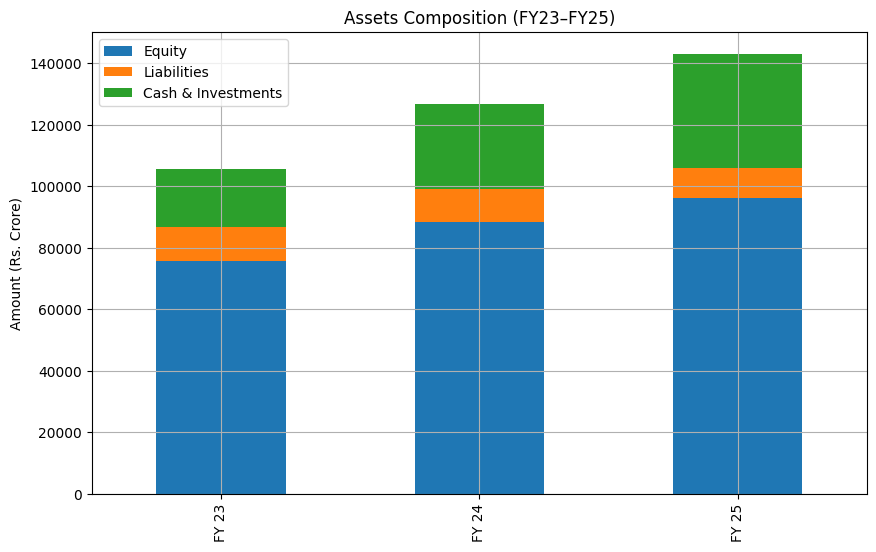

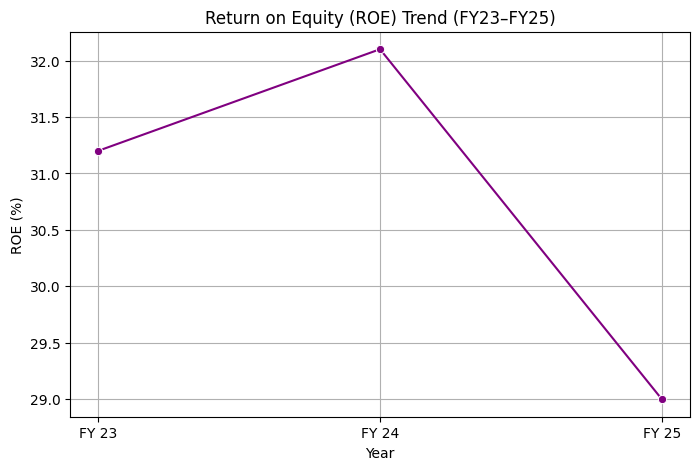

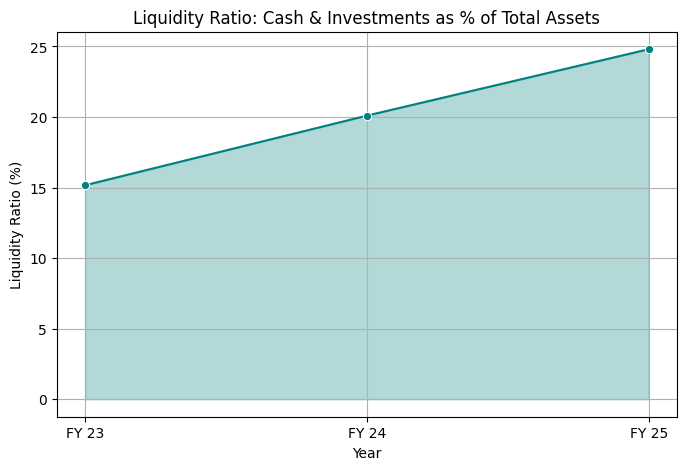

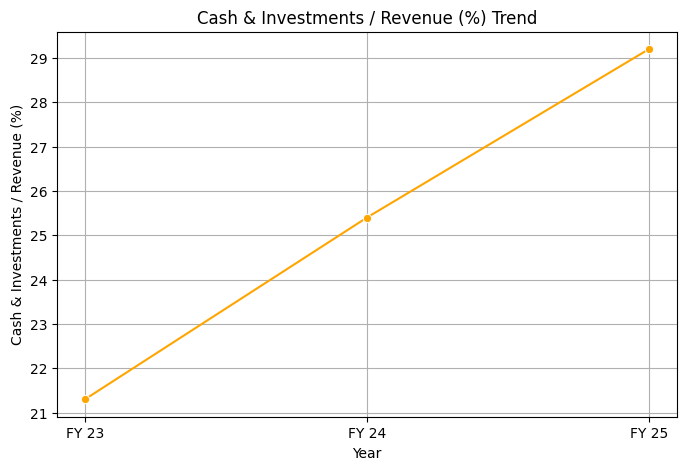

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Helper function to clean dataframe columns and Particulars column
def clean_df(df):
    df.columns = df.columns.str.strip()
    df['Particulars'] = df['Particulars'].str.strip()
    return df

# Load files
balance_sheet_data = pd.read_excel("/content/Balance Sheet Data.xlsx", header=1)
balance_sheet_ratios = pd.read_excel("/content/Balance Sheet Ratios.xlsx", header=1)

balance_sheet_data = clean_df(balance_sheet_data)
balance_sheet_ratios = clean_df(balance_sheet_ratios)

years = ['FY 23', 'FY 24', 'FY 25']

# ---- Trend in Total Assets, Equity, Liabilities, Cash & Investments ----
assets = balance_sheet_data.loc[balance_sheet_data['Particulars'] == 'Total assets', years].values.flatten().astype(float)
equity = balance_sheet_data.loc[balance_sheet_data['Particulars'] == 'Total equity', years].values.flatten().astype(float)
liabilities = balance_sheet_data.loc[balance_sheet_data['Particulars'] == 'Non-current liabilities', years].values.flatten().astype(float)
cash = balance_sheet_data.loc[balance_sheet_data['Particulars'] == 'Cash and cash equivalents', years].values.flatten().astype(float)
investments = balance_sheet_data.loc[balance_sheet_data['Particulars'] == 'Current investments', years].values.flatten().astype(float)
cash_investments = cash + investments

trend_df = pd.DataFrame({'Year': years,
                         'Total Assets': assets,
                         'Total Equity': equity,
                         'Non-current Liabilities': liabilities,
                         'Cash & Investments': cash_investments})

trend_df.set_index('Year', inplace=True)

# ---- Liquidity Ratio: Cash + Investments / Total Assets ----
liquidity_ratio = (cash_investments / assets) * 100  # percentage

print("Liquidity Ratios (%):")
for y, lr in zip(years, liquidity_ratio):
    print(f"{y}: {lr:.2f}%")

# ---- Cash & Investments / Revenue % from Ratios Sheet ----
cash_rev_percent = balance_sheet_ratios.loc[
    balance_sheet_ratios['Particulars'] == 'Consolidated cash and investments / revenue (%)',
    years
].values.flatten().astype(float)

# ---- ROE (%) from Ratios Sheet ----
roe = balance_sheet_ratios.loc[
    balance_sheet_ratios['Particulars'].str.contains('Return on Equity', case=False),
    years
].values.flatten().astype(float)

# ---- Charts ----

# Stacked bar chart for Assets composition
composition_df = pd.DataFrame({
    'Equity': equity,
    'Liabilities': liabilities,
    'Cash & Investments': cash_investments
}, index=years)
composition_df.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Assets Composition (FY23–FY25)')
plt.ylabel('Amount (Rs. Crore)')
plt.grid(True)
plt.show()

# Line chart for ROE trend
plt.figure(figsize=(8, 5))
sns.lineplot(x=years, y=roe, marker='o', color='purple')
plt.title('Return on Equity (ROE) Trend (FY23–FY25)')
plt.ylabel('ROE (%)')
plt.xlabel('Year')
plt.grid(True)
plt.show()

# Area chart for Cash & Investments % of Assets
plt.figure(figsize=(8, 5))
sns.lineplot(x=years, y=liquidity_ratio, marker='o', color='teal')
plt.fill_between(years, liquidity_ratio, color='teal', alpha=0.3)
plt.title('Liquidity Ratio: Cash & Investments as % of Total Assets')
plt.ylabel('Liquidity Ratio (%)')
plt.xlabel('Year')
plt.grid(True)
plt.show()

# Line chart for Cash & Investments / Revenue % trend
plt.figure(figsize=(8,5))
sns.lineplot(x=years, y=cash_rev_percent, marker='o', color='orange')
plt.title('Cash & Investments / Revenue (%) Trend')
plt.ylabel('Cash & Investments / Revenue (%)')
plt.xlabel('Year')
plt.grid(True)
plt.show()


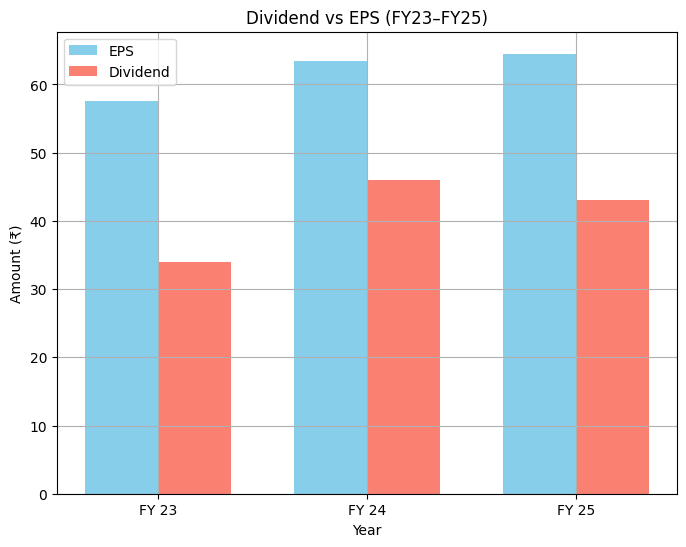

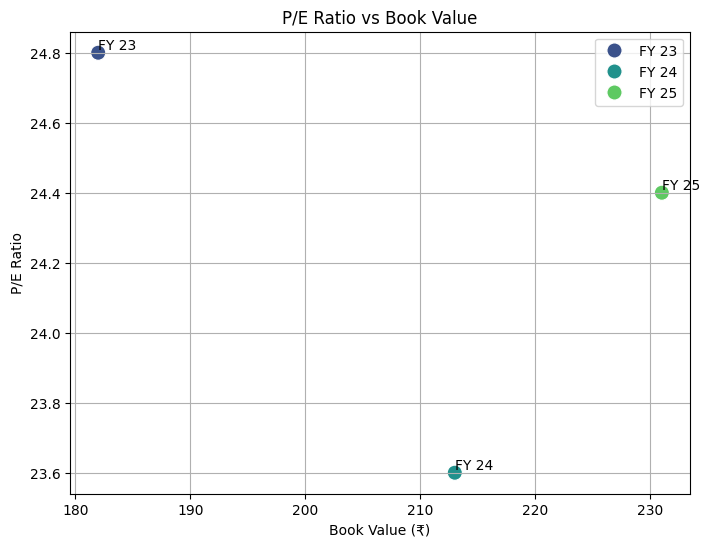

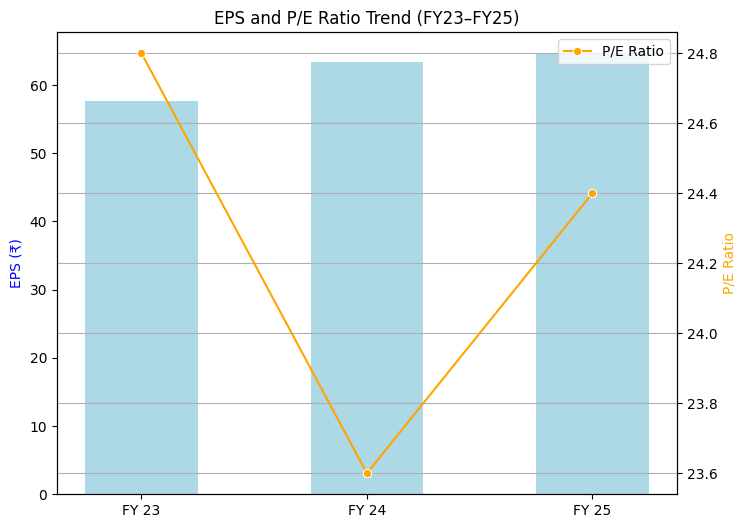

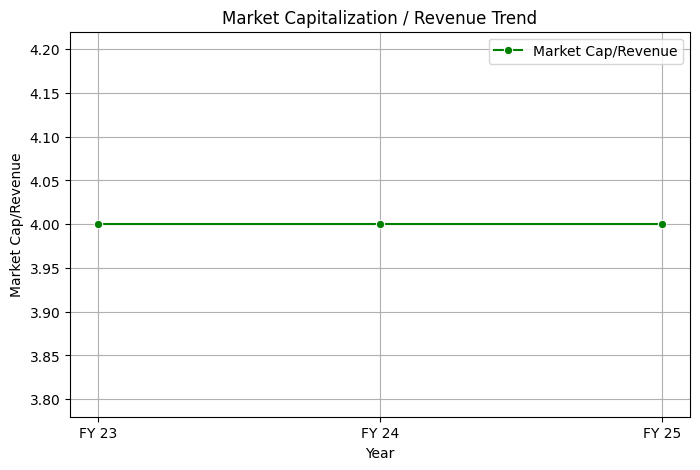

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def clean_df(df):
    df.columns = df.columns.str.strip()
    df['Particulars'] = df['Particulars'].str.strip()
    return df

# Load Per Share sheet
per_share_data = pd.read_excel("/content/Per Share Data and Ratios.xlsx", header=1)
per_share_data = clean_df(per_share_data)
years = ['FY 23', 'FY 24', 'FY 25']

# Extract EPS, Dividend, Book Value, P/E Ratio, Market Cap/Revenue for each year
eps = per_share_data.loc[per_share_data['Particulars'] == 'Basic EPS', years].values.flatten().astype(float)
dividend = per_share_data.loc[per_share_data['Particulars'] == 'Dividend per share', years].values.flatten().astype(float)
book_value = per_share_data.loc[per_share_data['Particulars'] == 'Book Value (₹)', years].values.flatten().astype(float)
pe_ratio = per_share_data.loc[per_share_data['Particulars'].str.contains('Price / earnings', case=False), years].values.flatten().astype(float)
market_cap_rev = per_share_data.loc[per_share_data['Particulars'].str.contains('Market capitalization / revenue', case=False), years].values.flatten().astype(float)

# --- Bar Chart: Dividend vs EPS ---
plt.figure(figsize=(8,6))
width = 0.35
x = np.arange(len(years))
plt.bar(x - width/2, eps, width, label="EPS", color="skyblue")
plt.bar(x + width/2, dividend, width, label="Dividend", color="salmon")
plt.xticks(x, years)
plt.title("Dividend vs EPS (FY23–FY25)")
plt.xlabel("Year")
plt.ylabel("Amount (₹)")
plt.legend()
plt.grid(True)
plt.show()

# --- Scatter Plot: P/E vs Book Value ---
plt.figure(figsize=(8,6))
sns.scatterplot(x=book_value, y=pe_ratio, hue=years, s=120, palette="viridis")
for i, year in enumerate(years):
    plt.text(book_value[i], pe_ratio[i], year, fontsize=10, ha='left', va='bottom')
plt.title("P/E Ratio vs Book Value")
plt.xlabel("Book Value (₹)")
plt.ylabel("P/E Ratio")
plt.grid(True)
plt.show()

# --- Combo Chart: EPS (bar) and P/E (line) ---
fig, ax1 = plt.subplots(figsize=(8,6))
ax1.bar(years, eps, color="lightblue", width=0.5, label="EPS")
ax1.set_ylabel("EPS (₹)", color="blue")
ax1.set_title("EPS and P/E Ratio Trend (FY23–FY25)")

ax2 = ax1.twinx()
sns.lineplot(x=years, y=pe_ratio, marker="o", color="orange", label="P/E Ratio", ax=ax2)
ax2.set_ylabel("P/E Ratio", color="orange")
ax2.legend(loc='upper right')
plt.grid(True)
plt.show()

# --- Additional: Market Cap/Revenue as a line chart ---
plt.figure(figsize=(8, 5))
sns.lineplot(x=years, y=market_cap_rev, marker='o', color='green', label='Market Cap/Revenue')
plt.title('Market Capitalization / Revenue Trend')
plt.xlabel('Year')
plt.ylabel('Market Cap/Revenue')
plt.grid(True)
plt.show()


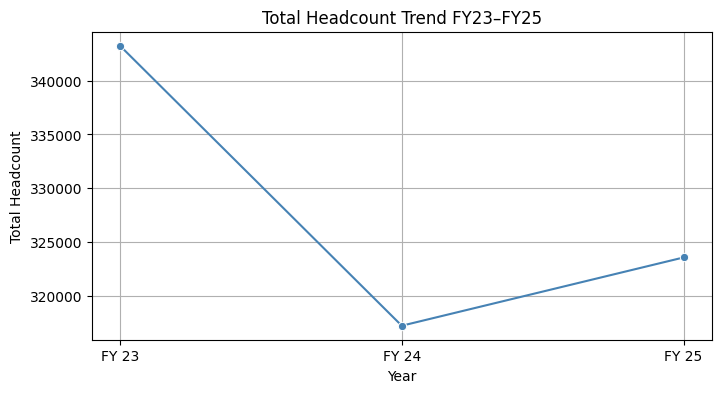

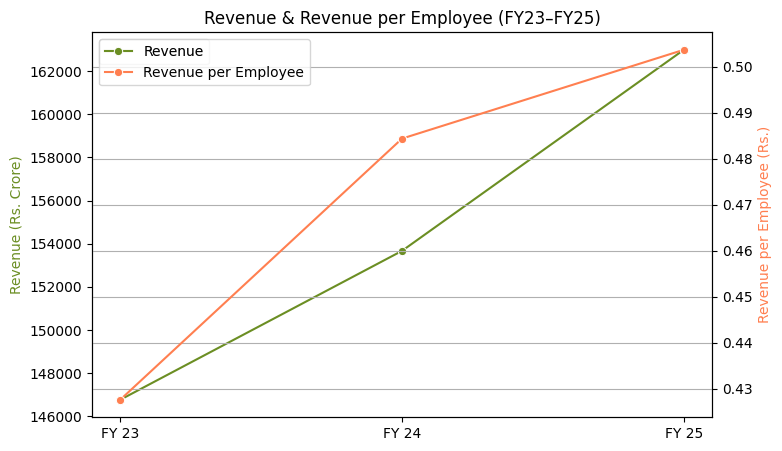

FY 23: Headcount=343234, Revenue=146767 Cr, Revenue/Employee=0.43 Rs
FY 24: Headcount=317240, Revenue=153670 Cr, Revenue/Employee=0.48 Rs
FY 25: Headcount=323578, Revenue=162990 Cr, Revenue/Employee=0.50 Rs

Observation: Revenue per Employee increased from FY23 to FY25, indicating improved workforce efficiency.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def clean_df(df):
    df.columns = df.columns.str.strip()
    df['Particulars'] = df['Particulars'].str.strip()
    return df

# Load Excel sheets (ensure header is correct)
pl_data = pd.read_excel("/content/P & L Data (in Rs. Crore).xlsx", header=1)
employee_data = pd.read_excel("/content/Employee Data.xlsx", header=1)
pl_data = clean_df(pl_data)
employee_data = clean_df(employee_data)
years = ['FY 23', 'FY 24', 'FY 25']

# Get Revenue for each year
revenue = pl_data.loc[pl_data['Particulars'] == 'Revenue', years].values.flatten().astype(float)
# Get Total Headcount for each year
headcount = employee_data.loc[employee_data['Particulars'] == 'Total Headcount', years].values.flatten().astype(float)

# Calculate Revenue per Employee
rev_per_emp = revenue / headcount

# --- Line Chart: Headcount over 3 Years ---
plt.figure(figsize=(8, 4))
sns.lineplot(x=years, y=headcount, marker='o', color='steelblue')
plt.title("Total Headcount Trend FY23–FY25")
plt.xlabel("Year")
plt.ylabel("Total Headcount")
plt.grid(True)
plt.show()

# --- Combo Chart: Revenue vs Revenue per Employee ---
fig, ax1 = plt.subplots(figsize=(8, 5))
sns.lineplot(x=years, y=revenue, marker='o', ax=ax1, color='olivedrab', label='Revenue')
ax1.set_ylabel("Revenue (Rs. Crore)", color='olivedrab')
ax1.set_title("Revenue & Revenue per Employee (FY23–FY25)")

ax2 = ax1.twinx()
sns.lineplot(x=years, y=rev_per_emp, marker='o', ax=ax2, color='coral', label='Revenue per Employee')
ax2.set_ylabel("Revenue per Employee (Rs.)", color='coral')
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
plt.grid(True)
plt.show()

# --- Observations: Efficiency Trend ---
for i, year in enumerate(years):
    print(f"{year}: Headcount={int(headcount[i])}, Revenue={revenue[i]:.0f} Cr, Revenue/Employee={rev_per_emp[i]:.2f} Rs")

if rev_per_emp[-1] > rev_per_emp[0]:
    print(f"\nObservation: Revenue per Employee increased from FY23 to FY25, indicating improved workforce efficiency.")
elif rev_per_emp[-1] < rev_per_emp[0]:
    print(f"\nObservation: Revenue per Employee declined from FY23 to FY25, indicating lower productivity per staff.")
else:
    print(f"\nObservation: Revenue per Employee remained stable across the period.")


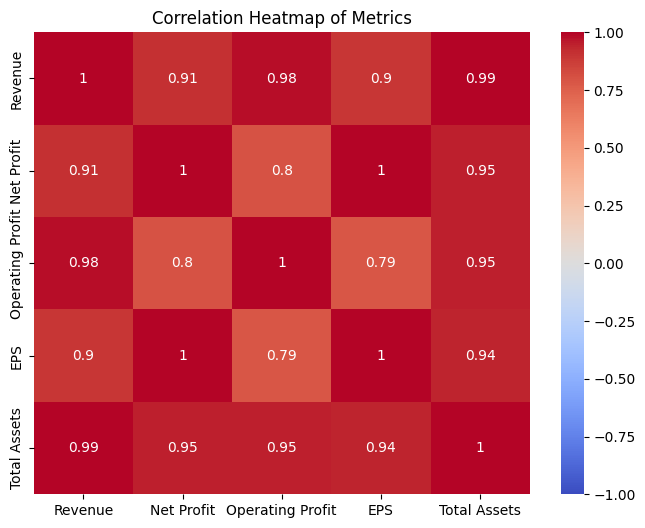

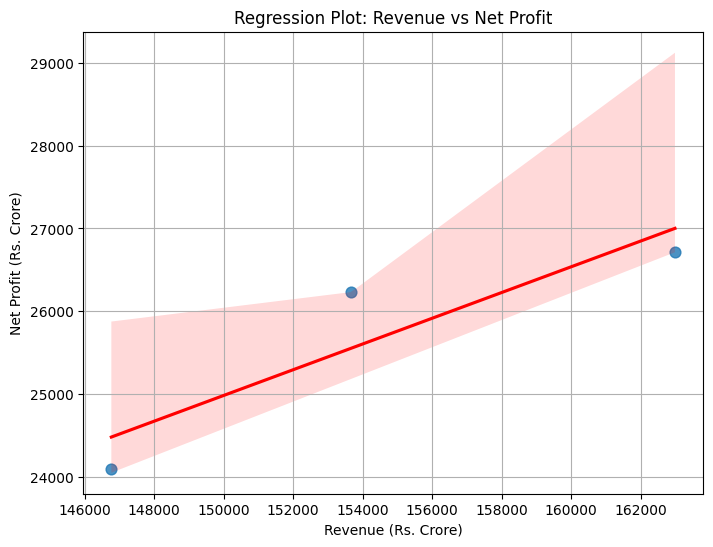

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def clean_df(df):
    df.columns = df.columns.str.strip()
    df['Particulars'] = df['Particulars'].str.strip()
    return df

# Load necessary sheets with header=1
pl_data = pd.read_excel("/content/P & L Data (in Rs. Crore).xlsx", header=1)
pl_ratios = pd.read_excel("/content/P & L Ratios.xlsx", header=1)
per_share_data = pd.read_excel("/content/Per Share Data and Ratios.xlsx", header=1)
balance_sheet_data = pd.read_excel("/content/Balance Sheet Data.xlsx", header=1)

# Clean all dataframes
pl_data = clean_df(pl_data)
pl_ratios = clean_df(pl_ratios)
per_share_data = clean_df(per_share_data)
balance_sheet_data = clean_df(balance_sheet_data)

years = ['FY 23', 'FY 24', 'FY 25']

# Extract data for correlations
revenue = pl_data.loc[pl_data['Particulars'] == 'Revenue', years].values.flatten().astype(float)
net_profit = pl_data.loc[pl_data['Particulars'] == 'Net profit attributable to the Owners of the company', years].values.flatten().astype(float)
operating_profit = pl_data.loc[pl_data['Particulars'] == 'Operating profit', years].values.flatten().astype(float)
eps = per_share_data.loc[per_share_data['Particulars'] == 'Basic EPS', years].values.flatten().astype(float)
total_assets = balance_sheet_data.loc[balance_sheet_data['Particulars'] == 'Total assets', years].values.flatten().astype(float)

# Create dataframe for correlation
corr_df = pd.DataFrame({
    'Revenue': revenue,
    'Net Profit': net_profit,
    'Operating Profit': operating_profit,
    'EPS': eps,
    'Total Assets': total_assets
})

# Compute correlation matrix
correlation_matrix = corr_df.corr()

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Metrics')
plt.show()

# Optional regression plot between Revenue and Net Profit
plt.figure(figsize=(8, 6))
sns.regplot(x='Revenue', y='Net Profit', data=corr_df, scatter_kws={'s': 60}, line_kws={'color': 'red'})
plt.title('Regression Plot: Revenue vs Net Profit')
plt.xlabel('Revenue (Rs. Crore)')
plt.ylabel('Net Profit (Rs. Crore)')
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import numpy as np

def clean_df(df):
    df.columns = df.columns.str.strip()
    df['Particulars'] = df['Particulars'].str.strip()
    return df

# Load sheets
pl_data = pd.read_excel("/content/P & L Data (in Rs. Crore).xlsx", header=1)
pl_ratios = pd.read_excel("/content/P & L Ratios.xlsx", header=1)
growth_ratios = pd.read_excel("/content/Growth Ratios.xlsx", header=1)
balance_sheet_data = pd.read_excel("/content/Balance Sheet Data.xlsx", header=1)
balance_sheet_ratios = pd.read_excel("/content/Balance Sheet Ratios.xlsx", header=1)
per_share_data = pd.read_excel("/content/Per Share Data and Ratios.xlsx", header=1)

pl_data = clean_df(pl_data)
pl_ratios = clean_df(pl_ratios)
growth_ratios = clean_df(growth_ratios)
balance_sheet_data = clean_df(balance_sheet_data)
balance_sheet_ratios = clean_df(balance_sheet_ratios)
per_share_data = clean_df(per_share_data)

years = ['FY 23', 'FY 24', 'FY 25']
n_years = 2  # 3 periods, so FY25/FY23 = 2 years of growth

# Utility for CAGR calculation
def calc_cagr(start, end, n):
    if start == 0 or end == 0:
        return np.nan
    return ((end / start) ** (1/n) - 1) * 100

# --- Extract relevant values ---
revenue = pl_data.loc[pl_data['Particulars'] == 'Revenue', years].values.flatten().astype(float)
net_profit = pl_data.loc[pl_data['Particulars'] == 'Net profit attributable to the Owners of the company', years].values.flatten().astype(float)
eps = per_share_data.loc[per_share_data['Particulars'] == 'Basic EPS', years].values.flatten().astype(float)
assets = balance_sheet_data.loc[balance_sheet_data['Particulars'] == 'Total assets', years].values.flatten().astype(float)

# Margins & ROE (averages)
gross_margin = pl_ratios.loc[pl_ratios['Particulars']=='Gross Profit/ revenue (%)', years].values.flatten().astype(float)
operating_margin = pl_ratios.loc[pl_ratios['Particulars']=='Operating profit/ revenue (%)', years].values.flatten().astype(float)
net_margin = pl_ratios.loc[pl_ratios['Particulars']=='Profit after tax (PAT) / Revenue (%)', years].values.flatten().astype(float)
roe = balance_sheet_ratios.loc[balance_sheet_ratios['Particulars'].str.contains('Return on Equity', case=False), years].values.flatten().astype(float)

# --- Calculate CAGR ---
summary_data = {
    "Metric": ["Revenue (Rs. Crore)", "Net Profit (Rs. Crore)", "EPS", "Total Assets (Rs. Crore)"],
    "FY23": [revenue[0], net_profit[0], eps[0], assets[0]],
    "FY25": [revenue[2], net_profit[2], eps[2], assets[2]],
    "CAGR (%)": [
        calc_cagr(revenue[0], revenue[2], n_years),
        calc_cagr(net_profit[0], net_profit[2], n_years),
        calc_cagr(eps[0], eps[2], n_years),
        calc_cagr(assets[0], assets[2], n_years)
    ]
}

summary_df = pd.DataFrame(summary_data)

# --- Margins and ROE averages ---
avg_margins_roe = pd.DataFrame({
    "Metric": ["Gross Profit Margin (%)", "Operating Profit Margin (%)", "Net Profit Margin (%)", "ROE (%)"],
    "FY23": [gross_margin[0], operating_margin[0], net_margin[0], roe[0]],
    "FY24": [gross_margin[1], operating_margin[1], net_margin[1], roe[1]],
    "FY25": [gross_margin[2], operating_margin[2], net_margin[2], roe[2]],
    "Average (%)": [
        np.mean(gross_margin),
        np.mean(operating_margin),
        np.mean(net_margin),
        np.mean(roe)
    ]
})

# --- Display summary tables ---
print("\nSummary Table: CAGR for Key Metrics")
print(summary_df.round(2).to_string(index=False))
print("\nSummary Table: Margins & ROE (Averages Over 3 Years)")
print(avg_margins_roe.round(2).to_string(index=False))



Summary Table: CAGR for Key Metrics
                  Metric      FY23     FY25  CAGR (%)
     Revenue (Rs. Crore) 146767.00 162990.0      5.38
  Net Profit (Rs. Crore)  24095.00  26713.0      5.29
                     EPS     57.63     64.5      5.79
Total Assets (Rs. Crore) 125816.00 148903.0      8.79

Summary Table: Margins & ROE (Averages Over 3 Years)
                     Metric  FY23  FY24  FY25  Average (%)
    Gross Profit Margin (%)  30.3  30.1  30.5        30.30
Operating Profit Margin (%)  21.1  20.7  21.1        20.97
      Net Profit Margin (%)  16.4  17.1  16.4        16.63
                    ROE (%)  31.2  32.1  29.0        30.77


In [ ]:
import pandas as pd
import numpy as np

def clean_df(df):
    df.columns = df.columns.str.strip()
    df['Particulars'] = df['Particulars'].str.strip()
    return df

# Load required files
growth_ratios = pd.read_excel("/content/Growth Ratios.xlsx", header=1)
growth_ratios = clean_df(growth_ratios)
years = ['FY 23', 'FY 24', 'FY 25']

# Select key metrics
key_metrics = ['Revenue (%)', 'Net profit (%)', 'Basic EPS (%)']

# Summary DataFrame: collect YoY growths for key metrics
desc_df = pd.DataFrame()
for metric in key_metrics:
    yoy = growth_ratios.loc[growth_ratios['Particulars'] == metric, years].values.flatten().astype(float)
    desc_df = pd.concat([desc_df, pd.DataFrame({'Metric': metric, 'Year': years, 'YoY Growth (%)': yoy})])

# Pivot for easy comparison
pivot_df = desc_df.pivot(index='Year', columns='Metric', values='YoY Growth (%)')
print("\nYear-on-Year Growth for Key Items")
print(pivot_df.round(2))

# Min, Max, Mean for each metric
stats = {}
for metric in key_metrics:
    values = desc_df[desc_df['Metric'] == metric]['YoY Growth (%)'].values
    stats[metric] = {
        'min': np.min(values),
        'max': np.max(values),
        'mean': np.mean(values)
    }

# Print summary statistics table
print("\nGrowth Statistics (Min, Max, Mean) for Each Metric")
stats_df = pd.DataFrame(stats).T
stats_df.columns = ['Min YoY (%)', 'Max YoY (%)', 'Mean YoY (%)']
print(stats_df.round(2))

# Highlight top/bottom performing metrics (based on mean growth)
sorted_metrics = sorted(stats.items(), key=lambda x: x[1]['mean'], reverse=True)
print("\nTop Performing Metric (mean YoY growth):", sorted_metrics[0][0])
print("Bottom Performing Metric (mean YoY growth):", sorted_metrics[-1][0])

# Consistent growth vs volatility
# Consistency: standard deviation is low; volatility: high std deviation
print("\nConsistency / Volatility of Growth:")
for metric in key_metrics:
    stdev = np.std(desc_df[desc_df['Metric'] == metric]['YoY Growth (%)'].values)
    label = "Consistent" if stdev < 2.5 else "Volatile"
    print(f"{metric}: Std Dev={stdev:.2f} – {label}")




Year-on-Year Growth for Key Items
Metric  Basic EPS (%)  Net profit (%)  Revenue (%)
Year                                              
FY 23             9.7             9.0         20.7
FY 24            10.0             8.9          4.7
FY 25             1.8             1.8          6.1

Growth Statistics (Min, Max, Mean) for Each Metric
                Min YoY (%)  Max YoY (%)  Mean YoY (%)
Revenue (%)             4.7         20.7         10.50
Net profit (%)          1.8          9.0          6.57
Basic EPS (%)           1.8         10.0          7.17

Top Performing Metric (mean YoY growth): Revenue (%)
Bottom Performing Metric (mean YoY growth): Net profit (%)

Consistency / Volatility of Growth:
Revenue (%): Std Dev=7.24 – Volatile
Net profit (%): Std Dev=3.37 – Volatile
Basic EPS (%): Std Dev=3.80 – Volatile


Index(['Particulars', 'FY 25', 'FY 24', 'FY 23'], dtype='object')
Index(['Particulars', 'FY 25', 'FY 24', 'FY 23'], dtype='object')


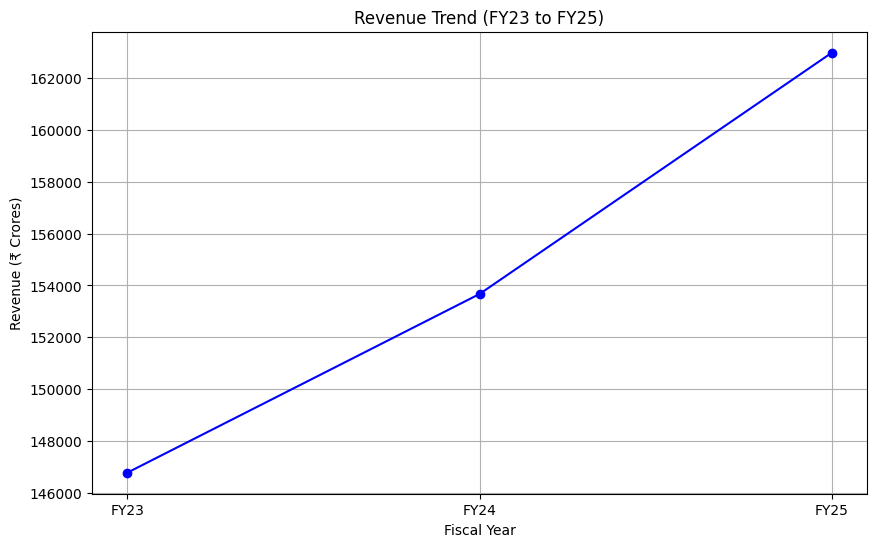

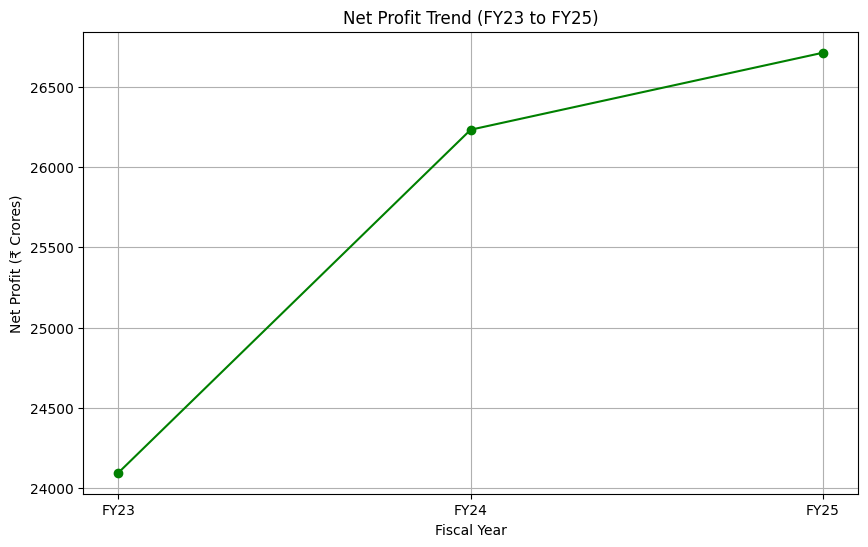

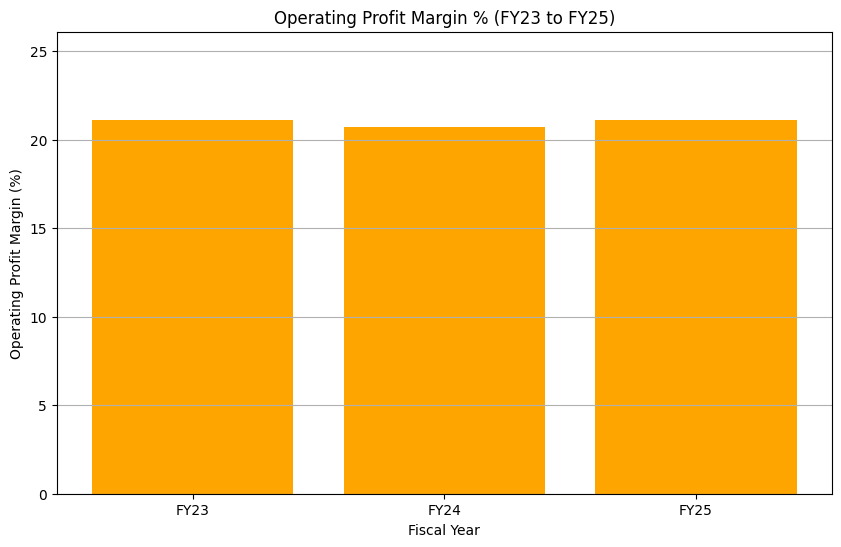

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data skipping the first row, which is a title row
pl_data = pd.read_excel("/content/P & L Data (in Rs. Crore).xlsx", header=1)
pl_ratios = pd.read_excel("/content/P & L Ratios.xlsx", header=1)

# Check the columns for verification
print(pl_data.columns)
print(pl_ratios.columns)

# Extract Revenue and Net Profit
revenue = pl_data.loc[pl_data['Particulars'] == 'Revenue', ['FY 23', 'FY 24', 'FY 25']].values.flatten()
net_profit = pl_data.loc[pl_data['Particulars'] == 'Net profit attributable to the Owners of the company', ['FY 23', 'FY 24', 'FY 25']].values.flatten()

# Extract Operating Profit Margin from ratios file
operating_profit_margin = pl_ratios.loc[pl_ratios['Particulars'] == 'Operating profit/ revenue (%)', ['FY 23', 'FY 24', 'FY 25']].values.flatten()

years = ['FY23', 'FY24', 'FY25']

# Plot Revenue Trend
plt.figure(figsize=(10, 6))
plt.plot(years, revenue, marker='o', linestyle='-', color='blue')
plt.title('Revenue Trend (FY23 to FY25)')
plt.xlabel('Fiscal Year')
plt.ylabel('Revenue (₹ Crores)')
plt.grid(True)
plt.show()

# Plot Net Profit Trend
plt.figure(figsize=(10, 6))
plt.plot(years, net_profit, marker='o', linestyle='-', color='green')
plt.title('Net Profit Trend (FY23 to FY25)')
plt.xlabel('Fiscal Year')
plt.ylabel('Net Profit (₹ Crores)')
plt.grid(True)
plt.show()

# Plot Operating Profit Margin Bar Chart
plt.figure(figsize=(10, 6))
plt.bar(years, operating_profit_margin, color='orange')
plt.title('Operating Profit Margin % (FY23 to FY25)')
plt.xlabel('Fiscal Year')
plt.ylabel('Operating Profit Margin (%)')
plt.ylim(0, max(operating_profit_margin) + 5)
plt.grid(axis='y')
plt.show()


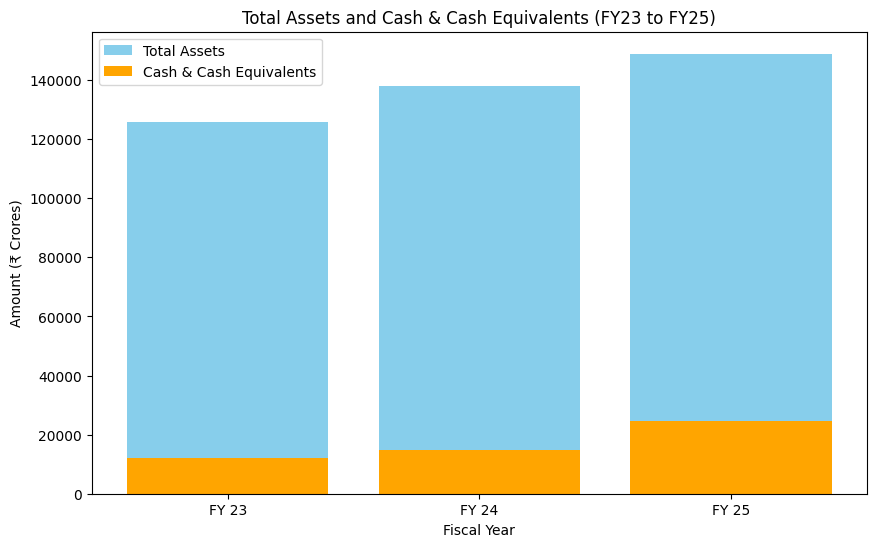

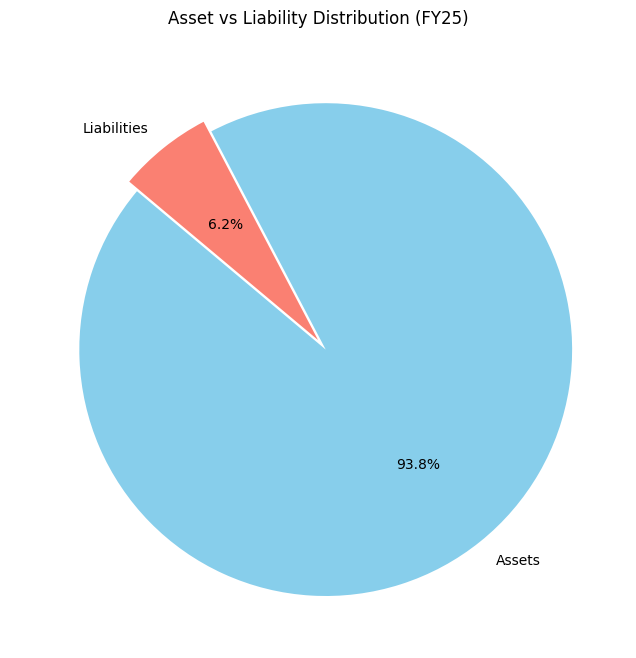

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load balance sheet data with correct header row
balance_sheet_data = pd.read_excel("/content/Balance Sheet Data.xlsx", header=1)

# Extract Total Assets and Cash & Cash Equivalents for FY23-FY25
years = ['FY 23', 'FY 24', 'FY 25']
total_assets = balance_sheet_data.loc[balance_sheet_data['Particulars'] == 'Total assets', years].values.flatten()
cash_equivalents = balance_sheet_data.loc[balance_sheet_data['Particulars'] == 'Cash and cash equivalents', years].values.flatten()

# Stacked Bar Chart of Total Assets and Cash & Cash Equivalents
plt.figure(figsize=(10, 6))
plt.bar(years, total_assets, label='Total Assets', color='skyblue')
plt.bar(years, cash_equivalents, label='Cash & Cash Equivalents', color='orange')
plt.title('Total Assets and Cash & Cash Equivalents (FY23 to FY25)')
plt.xlabel('Fiscal Year')
plt.ylabel('Amount (₹ Crores)')
plt.legend()
plt.show()

# Extract values for latest year FY25
total_assets_fy25 = balance_sheet_data.loc[balance_sheet_data['Particulars'] == 'Total assets', 'FY 25'].values[0]
non_current_liabilities_fy25 = balance_sheet_data.loc[balance_sheet_data['Particulars'] == 'Non-current liabilities', 'FY 25'].values[0]

# Prepare data for pie chart
assets_vs_liabilities = [total_assets_fy25, non_current_liabilities_fy25]
labels = ['Assets', 'Liabilities']
colors = ['skyblue', 'salmon']

# Pie Chart for Asset vs Liability Distribution (FY25)
plt.figure(figsize=(8, 8))
plt.pie(assets_vs_liabilities, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140, explode=(0.05, 0))
plt.title('Asset vs Liability Distribution (FY25)')
plt.show()
